ANALISIS EXPLORATORIO DE LOS DATOS (EDA) OBTENIDOS LUEGO DEL PROCESO DE ETL

In [1]:
# Importamos las librerías necesarias para el procesamiento y visualización de los datos. 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set(style="darkgrid")
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Cargamos el nuevo dataset obtenido luego del proceso de ETL, en fomato DataFrame. 
df = pd.read_csv(r"C:\Users\s7\Desktop\HENRY\Analisis_Alumnos\Alumnos_ETL.csv", sep= ",")

In [3]:
# Visualizamos las dimensiones de nuestro DataFrame. 
df.shape

(55, 19)

In [4]:
# Visualizamos nuestro DataFrame obtenido.
df.head(3)

,Division,Genero,Apellido,F. Nacim.,Afición,Nota_ej_razonamiento,Nota_ej_memorizacion,Oralidad,Activ_artística,Celular,Computadora,EJ. 1,EJ. 2,EJ. 3,EJ. 4,EJ. 5,Nota_primer_examen,Edad,Codigo_Identidad
0,1A,M,ABANTO,2011-08-27,Deportes,15.7,9.5,2.0,SÍ,sí,no,1.17,0.62,3.0,1.2,0.75,6.74,13,7b22f451
1,1A,M,BAZAN,2011-07-12,Deportes,18.5,12.5,2.0,T,sí,sí,0.83,0.62,3.0,1.2,0.25,6.00,13,bae50b48
2,1A,M,BERTOA,2011-07-18,Destrezas,14.5,14.5,1.0,SÍ,sí,sí,1.30,0.77,2.0,0.6,0.08,6.00,13,dce9a80e


In [5]:
# Visualizamos una descripción general de nuestro DataFrame. Cantidad de columnas, cantidad de datos no nulos, tipo de datos de cada columna, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Division              55 non-null     object 
 1   Genero                55 non-null     object 
 2   Apellido              55 non-null     object 
 3   F. Nacim.             55 non-null     object 
 4   Afición               55 non-null     object 
 5   Nota_ej_razonamiento  55 non-null     float64
 6   Nota_ej_memorizacion  55 non-null     float64
 7   Oralidad              55 non-null     float64
 8   Activ_artística       55 non-null     object 
 9   Celular               55 non-null     object 
 10  Computadora           55 non-null     object 
 11  EJ. 1                 55 non-null     float64
 12  EJ. 2                 55 non-null     float64
 13  EJ. 3                 55 non-null     float64
 14  EJ. 4                 55 non-null     float64
 15  EJ. 5                 55 

Los datos de la columna F. Nacim. vuelve a estar como object, pero vamos a trabajar con la columna Edad que sigue como int64.

In [6]:
# Visualizamos una descripción estadística de nuestro DataFrame. 
df.describe()

,Nota_ej_razonamiento,Nota_ej_memorizacion,Oralidad,EJ. 1,EJ. 2,EJ. 3,EJ. 4,EJ. 5,Nota_primer_examen,Edad
count,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000,55.000000
mean,16.812727,13.732727,1.436364,1.325636,0.748727,2.581818,1.385455,0.459273,7.325636,12.727273
std,1.953729,3.126532,0.500505,0.608336,0.241263,0.859391,0.999151,0.248908,1.404338,0.488935
min,12.500000,5.500000,1.000000,0.000000,0.150000,0.000000,0.000000,0.000000,5.000000,12.000000
25%,15.700000,12.500000,1.000000,0.830000,0.620000,3.000000,0.900000,0.250000,6.055000,12.000000
50%,16.500000,14.500000,1.000000,1.500000,0.850000,3.000000,1.200000,0.420000,7.350000,13.000000
75%,17.850000,16.000000,2.000000,1.865000,1.000000,3.000000,1.950000,0.670000,8.200000,13.000000
max,20.900000,19.800000,2.000000,2.000000,1.000000,3.000000,3.000000,1.000000,9.920000,14.000000


1 - Análisis univariado de las variables en estudio.

In [7]:
# Realizamos un conteo de la cantidad de alumnos por división. 
conteo_por_division = df['Division'].value_counts()

In [8]:
conteo_por_division

1B    28
1A    27
Name: Division, dtype: int64

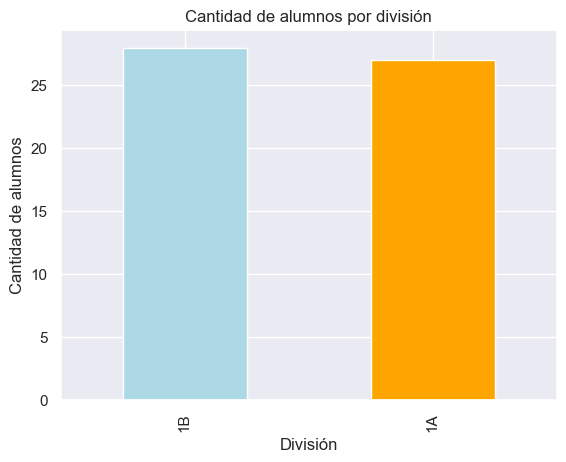

In [9]:
conteo_por_division.plot(kind='bar', color=['lightblue', 'orange'])
plt.title('Cantidad de alumnos por división')
plt.xlabel('División')
plt.ylabel('Cantidad de alumnos')
plt.show()

In [10]:
# Realizamos conteo de la cantidad total de masculinos y femeninos
conteo_genero = df['Genero'].value_counts()


In [11]:
conteo_genero

F    28
M    27
Name: Genero, dtype: int64

In [12]:
# Realizamos conteo de la cantidad de masculinos y femeninos por división.
conteo_genero_division = df.groupby(['Division', 'Genero']).size().unstack()

In [13]:
conteo_genero_division

Genero,F,M
Division,,
1A,13,14
1B,15,13


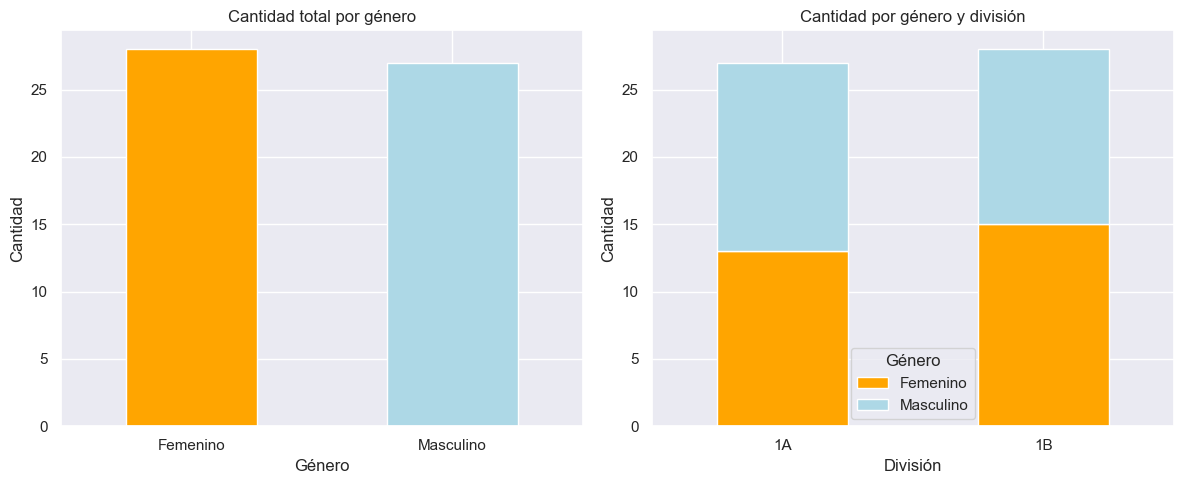

In [14]:
# Creamos subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Esto define `axes`
# Gráfico 1: Total de masculinos y femeninos
conteo_genero.plot(kind='bar', color=['orange', 'lightblue'], ax=axes[0])
axes[0].set_title('Cantidad total por género')
axes[0].set_xlabel('Género')
axes[0].set_ylabel('Cantidad')
axes[0].set_xticklabels(['Femenino', 'Masculino'], rotation=0)

# Gráfico 2: Masculinos y femeninos por división
conteo_genero_division.plot(kind='bar', stacked=True, color=['orange', 'lightblue'], ax=axes[1])
axes[1].set_title('Cantidad por género y división')
axes[1].set_xlabel('División')
axes[1].set_ylabel('Cantidad')
axes[1].legend(title='Género', labels=['Femenino', 'Masculino'])
axes[1].tick_params(axis='x', rotation=0)

# Ajustar espacios
plt.tight_layout()
plt.show()

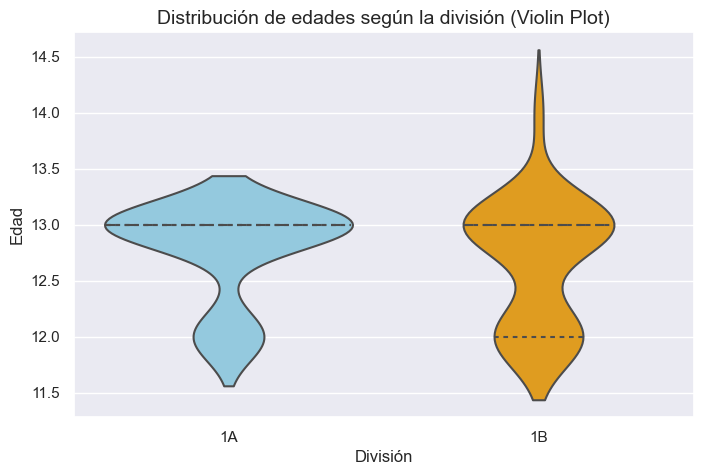

In [15]:
# Configuración del gráfico
plt.figure(figsize=(8, 5))
sns.violinplot(x='Division', y='Edad', data=df, palette=['skyblue', 'orange'], inner='quartile')

# Personalización del gráfico
plt.title('Distribución de edades según la división (Violin Plot)', fontsize=14)
plt.xlabel('División', fontsize=12)
plt.ylabel('Edad', fontsize=12)

# Mostrar el gráfico
plt.show()


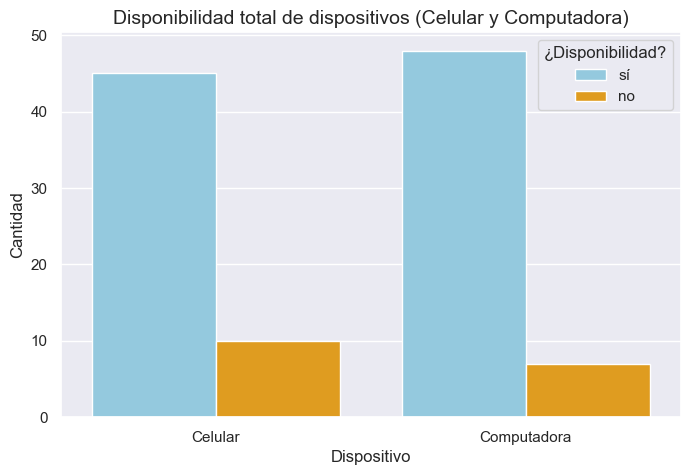

In [16]:
# Transformar los datos a formato largo para graficar más fácilmente
df_largo = df.melt(id_vars='Division', value_vars=['Celular', 'Computadora'], 
                   var_name='Dispositivo', value_name='Disponibilidad')

# Crear un gráfico para mostrar totales de "Sí" y "No"
plt.figure(figsize=(8, 5))
sns.countplot(data=df_largo, x='Dispositivo', hue='Disponibilidad', palette=['skyblue', 'orange'])

# Personalización del gráfico
plt.title('Disponibilidad total de dispositivos (Celular y Computadora)', fontsize=14)
plt.xlabel('Dispositivo', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.legend(title='¿Disponibilidad?', loc='upper right')

# Mostrar el gráfico
plt.show()


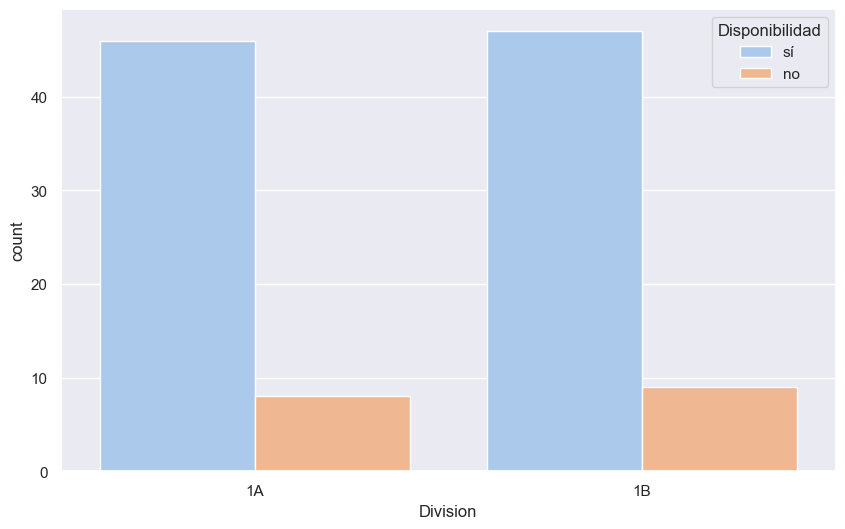

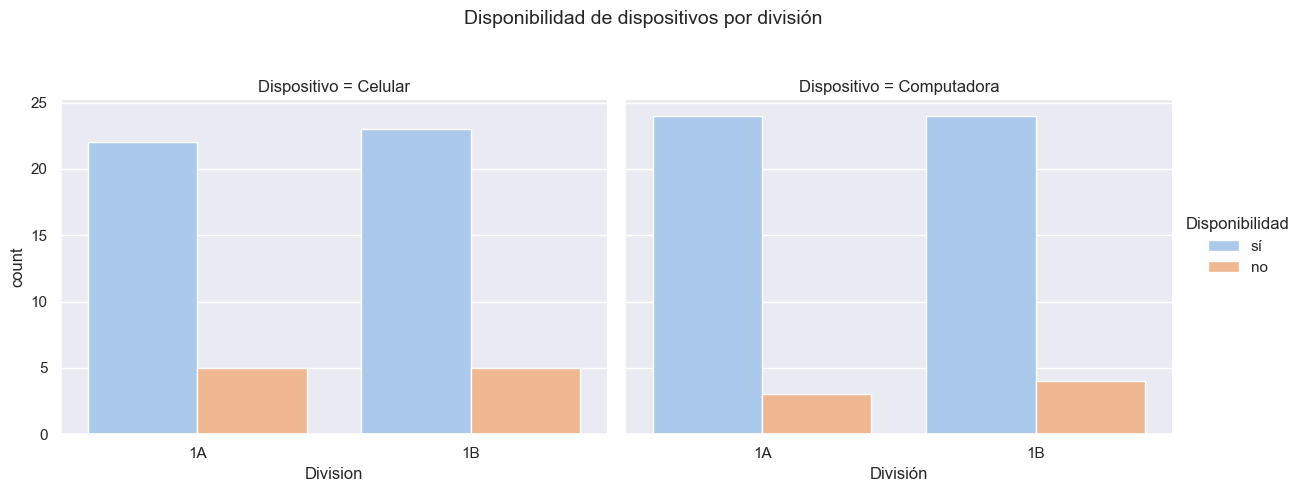

In [17]:
# Crear un gráfico para mostrar totales por división
plt.figure(figsize=(10, 6))
sns.countplot(data=df_largo, x='Division', hue='Disponibilidad', palette='pastel', dodge=True)

# Dividir el gráfico por tipo de dispositivo
sns.catplot(data=df_largo, x='Division', hue='Disponibilidad', col='Dispositivo', kind='count', 
            palette='pastel', height=5, aspect=1.2)

# Personalización del gráfico
plt.subplots_adjust(top=0.8)
plt.suptitle('Disponibilidad de dispositivos por división', fontsize=14)
plt.xlabel('División', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)

# Mostrar el gráfico
plt.show()


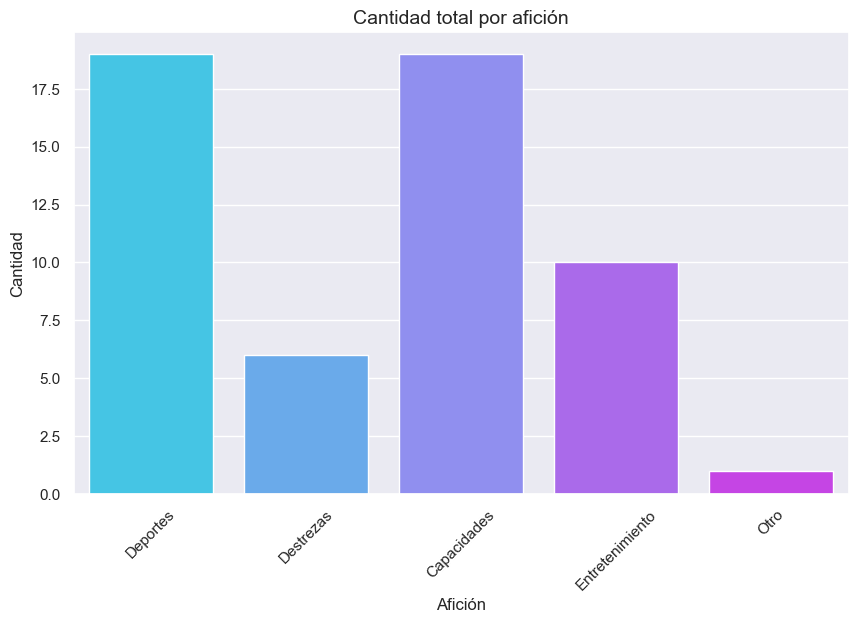

In [18]:
# Gráfico de barras para la cantidad total de cada afición
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Afición', palette='cool')

# Personalización del gráfico
plt.title('Cantidad total por afición', fontsize=14)
plt.xlabel('Afición', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)  # Girar etiquetas del eje X si son largas

# Mostrar el gráfico
plt.show()


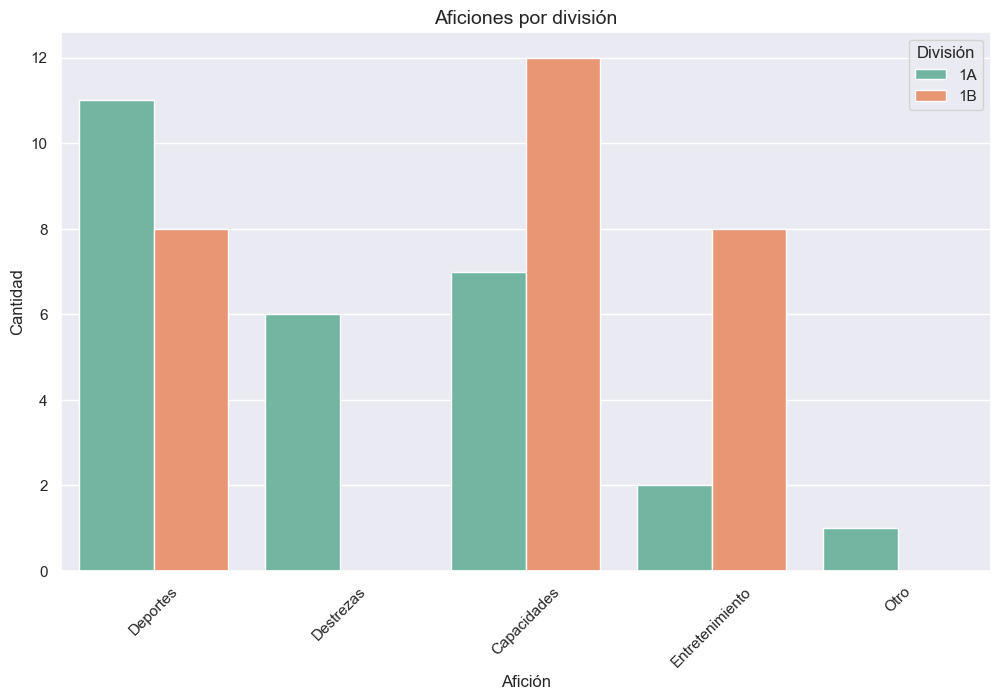

In [19]:
# Gráfico de barras para las aficiones por división
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Afición', hue='Division', palette='Set2')

# Personalización del gráfico
plt.title('Aficiones por división', fontsize=14)
plt.xlabel('Afición', fontsize=12)
plt.ylabel('Cantidad', fontsize=12)
plt.xticks(rotation=45)  # Girar etiquetas del eje X si son largas
plt.legend(title='División', loc='upper right')

# Mostrar el gráfico
plt.show()


2 - Análisis de variables numéricas. 

In [20]:
# Seleccionamos las columnas numéricas de las notas
notas_columnas = [
    'Nota_ej_razonamiento', 'Nota_ej_memorizacion', 'Oralidad',
    'EJ. 1', 'EJ. 2', 'EJ. 3', 'EJ. 4', 'EJ. 5', 'Nota_primer_examen'
]

In [21]:
# Calculamos las métricas para evaluar distribución de las notas.
distribucion_notas = pd.DataFrame({
    "Media": df[notas_columnas].mean(),
    "Mediana": df[notas_columnas].median(),
    "Varianza": df[notas_columnas].var()
})

In [22]:
distribucion_notas

,Media,Mediana,Varianza
Nota_ej_razonamiento,16.812727,16.50,3.817057
Nota_ej_memorizacion,13.732727,14.50,9.775205
Oralidad,1.436364,1.00,0.250505
EJ. 1,1.325636,1.50,0.370073
EJ. 2,0.748727,0.85,0.058208
EJ. 3,2.581818,3.00,0.738552
EJ. 4,1.385455,1.20,0.998303
EJ. 5,0.459273,0.42,0.061955
Nota_primer_examen,7.325636,7.35,1.972166


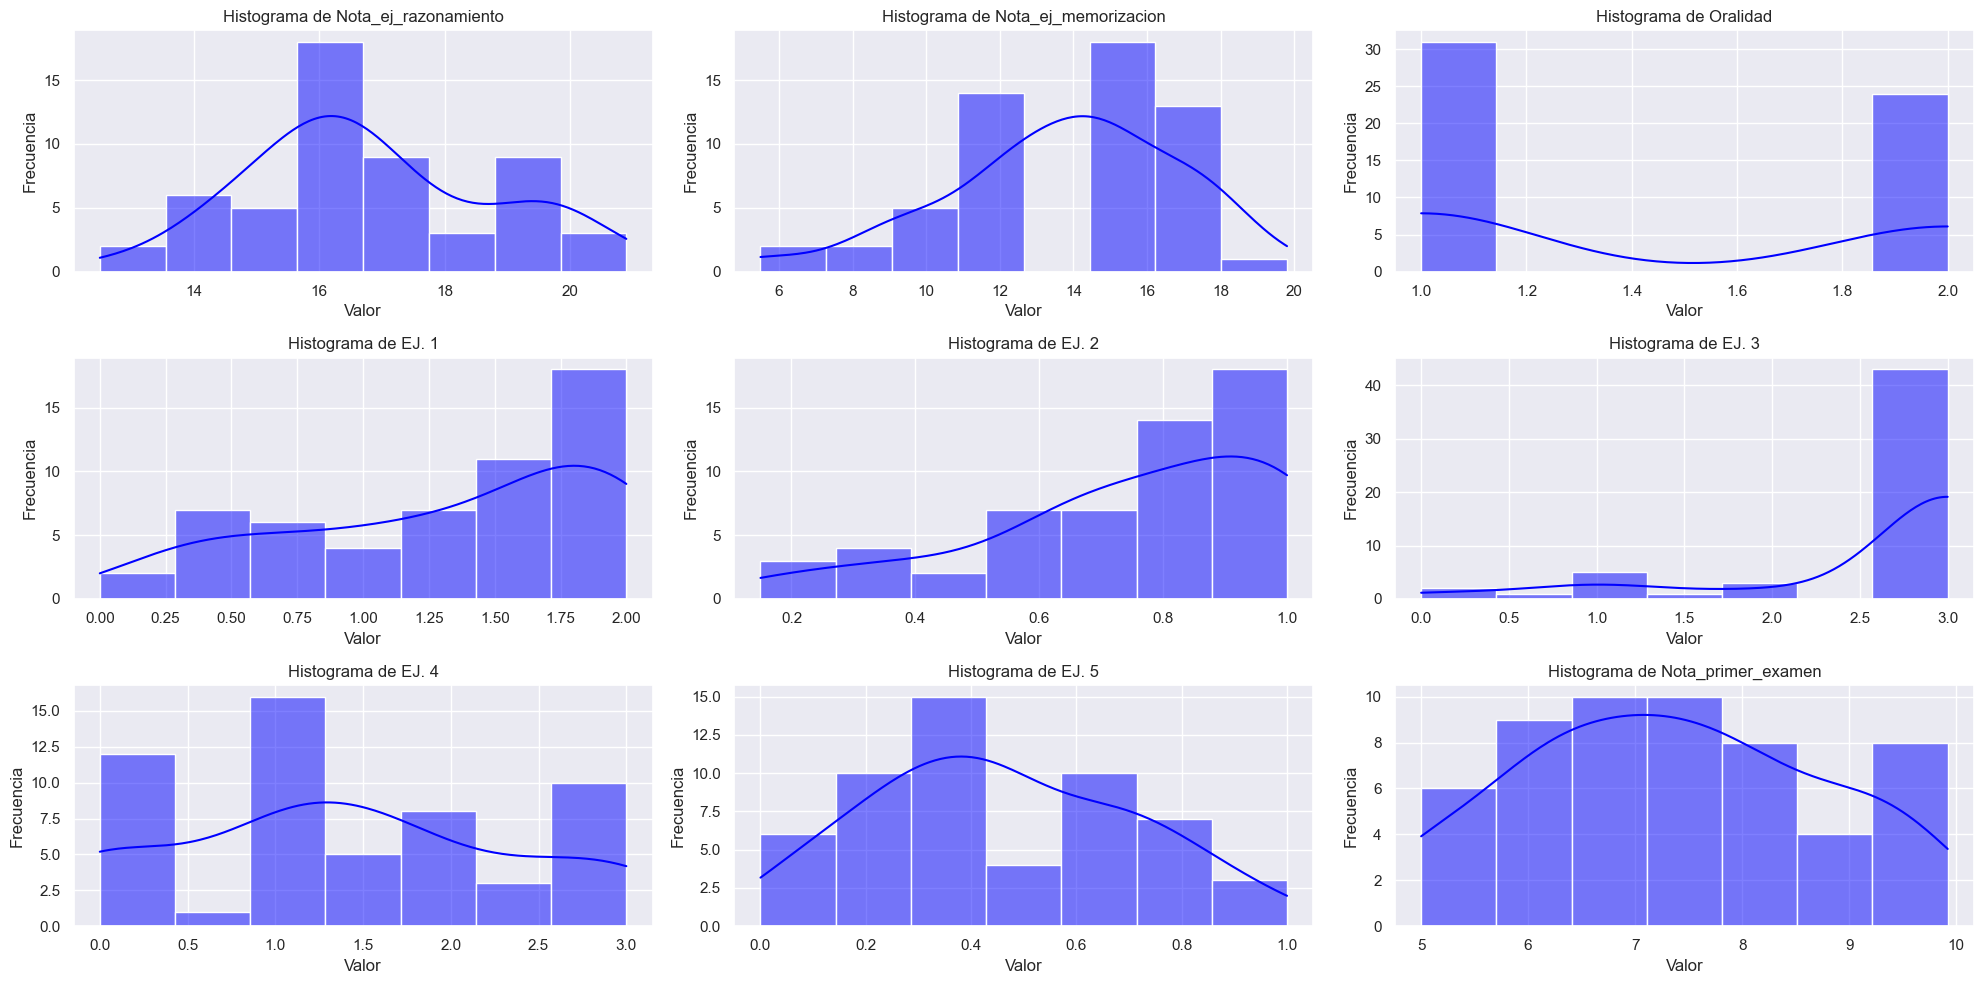

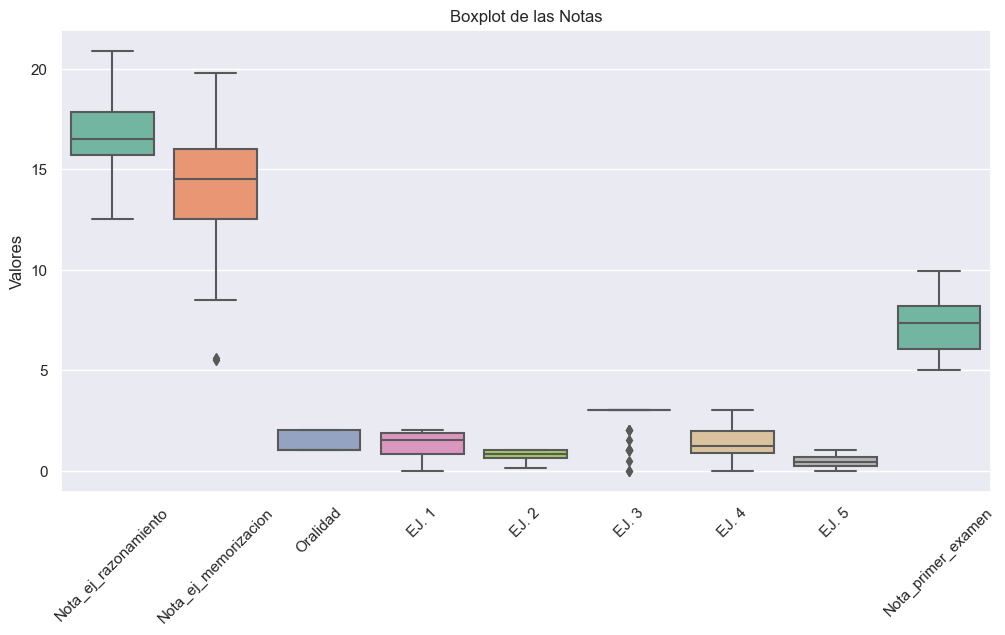

In [23]:
# Gráficos
plt.figure(figsize=(20, 10))

# Histograma para cada columna
for i, col in enumerate(notas_columnas, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[col], kde=True, color="blue")
    plt.title(f"Histograma de {col}")
    plt.xlabel("Valor")
    plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()

# Boxplots para visualizar la distribución
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[notas_columnas], palette="Set2")
plt.title("Boxplot de las Notas")
plt.xticks(rotation=45)
plt.ylabel("Valores")
plt.show()

3- Análisis multivariado

In [24]:
# Calcular la matriz de correlación
correlaciones = df[notas_columnas].corr()


In [25]:
correlaciones

,Nota_ej_razonamiento,Nota_ej_memorizacion,Oralidad,EJ. 1,EJ. 2,EJ. 3,EJ. 4,EJ. 5,Nota_primer_examen
Nota_ej_razonamiento,1.000000,0.529408,-0.526579,0.499048,0.328830,0.465360,0.568818,0.291222,0.541288
Nota_ej_memorizacion,0.529408,1.000000,-0.486209,0.421897,0.486639,0.340145,0.490642,0.267356,0.578401
Oralidad,-0.526579,-0.486209,1.000000,-0.560483,-0.334238,-0.428968,-0.542540,-0.238216,-0.614281
EJ. 1,0.499048,0.421897,-0.560483,1.000000,0.592503,0.493237,0.628369,0.305030,0.749501
EJ. 2,0.328830,0.486639,-0.334238,0.592503,1.000000,0.495318,0.578084,0.380641,0.613512
EJ. 3,0.465360,0.340145,-0.428968,0.493237,0.495318,1.000000,0.457548,0.366916,0.479730
EJ. 4,0.568818,0.490642,-0.542540,0.628369,0.578084,0.457548,1.000000,0.604368,0.880277
EJ. 5,0.291222,0.267356,-0.238216,0.305030,0.380641,0.366916,0.604368,1.000000,0.528972
Nota_primer_examen,0.541288,0.578401,-0.614281,0.749501,0.613512,0.479730,0.880277,0.528972,1.000000


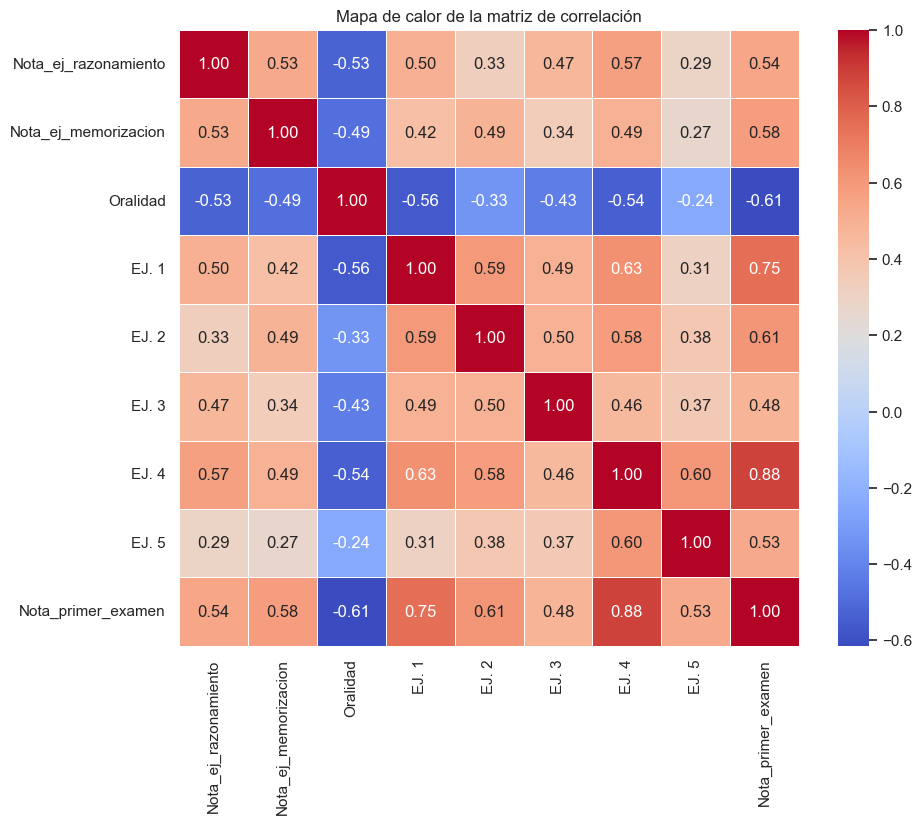

<Figure size 1200x600 with 0 Axes>

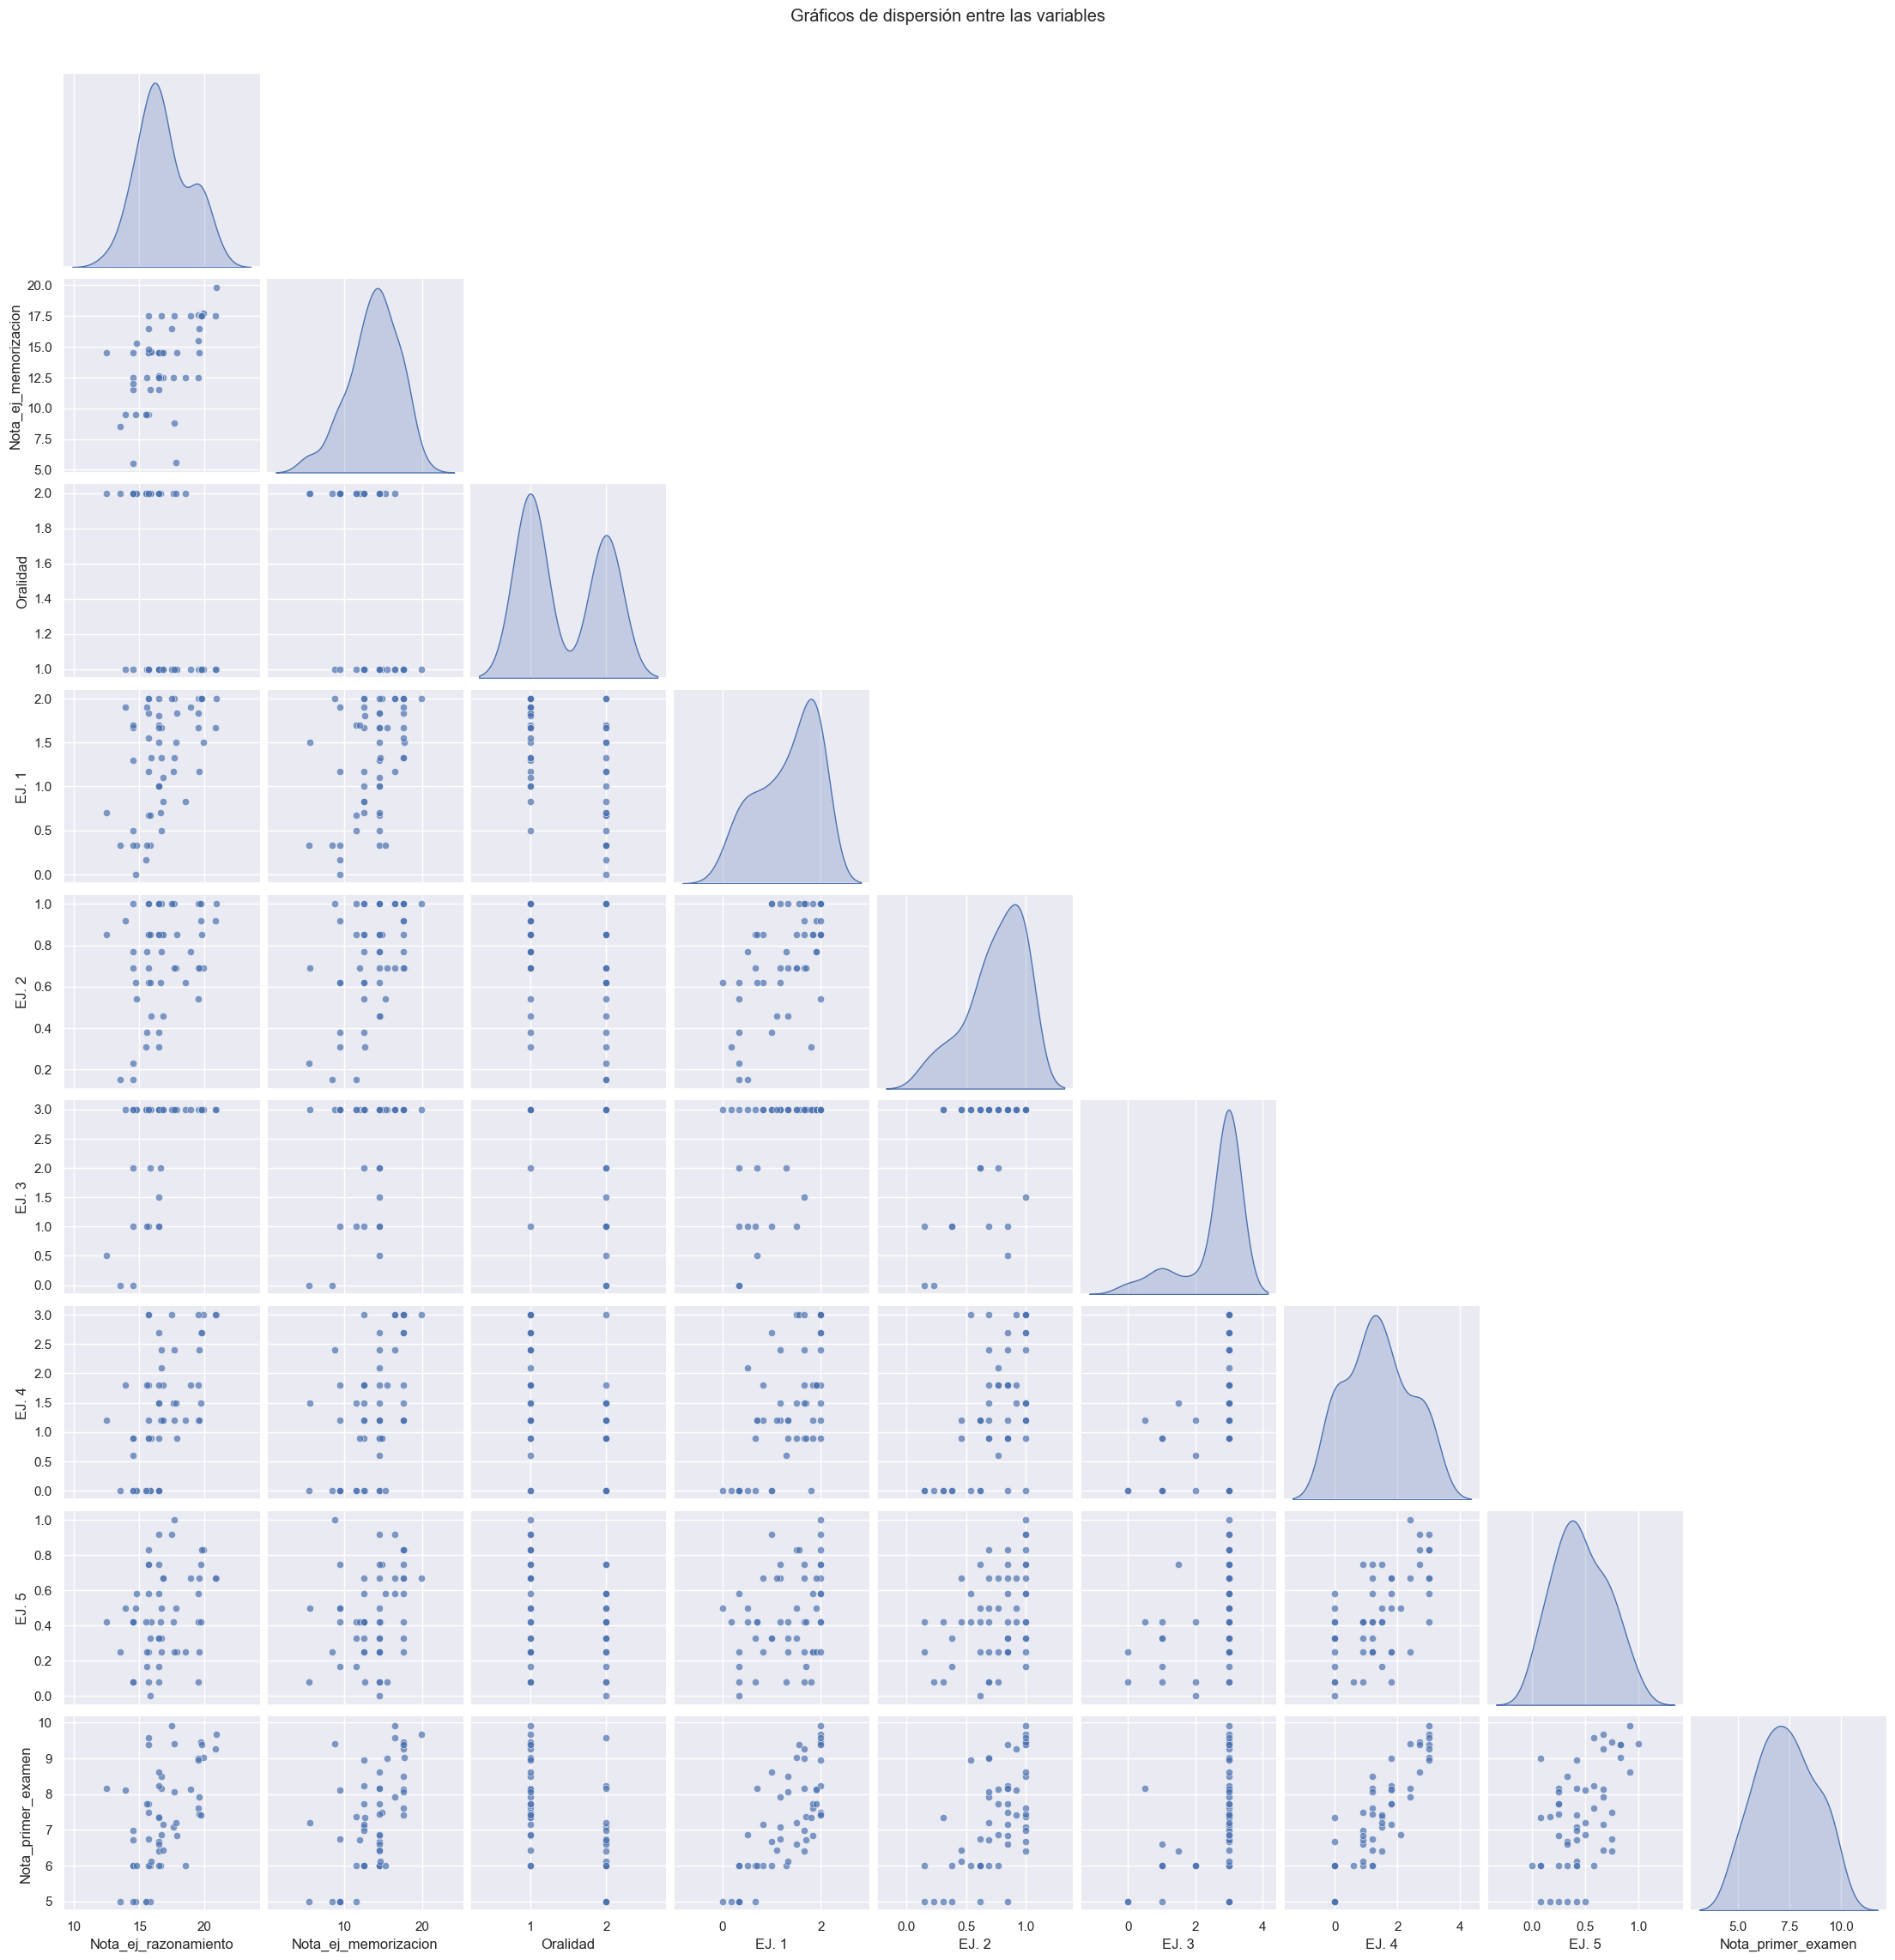

In [26]:
# Visualización de la matriz de correlación con un mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Mapa de calor de la matriz de correlación")
plt.show()

# Gráficos de dispersión entre dos variables de interés
plt.figure(figsize=(12, 6))
sns.pairplot(df[notas_columnas], diag_kind='kde', corner=True, plot_kws={"alpha": 0.7})
plt.suptitle("Gráficos de dispersión entre las variables", y=1.02)
plt.show()

Nos enfocamos en los gráficos de dispersión en variables específicas, como Nota_ej_razonamiento y Nota_primer_examen.

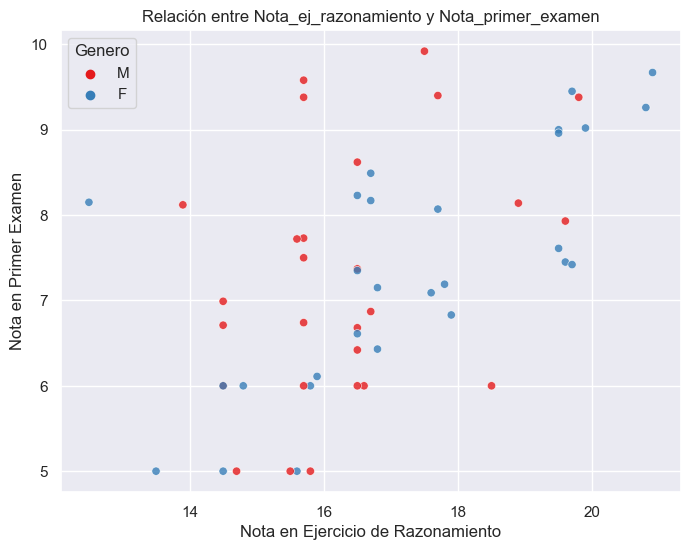

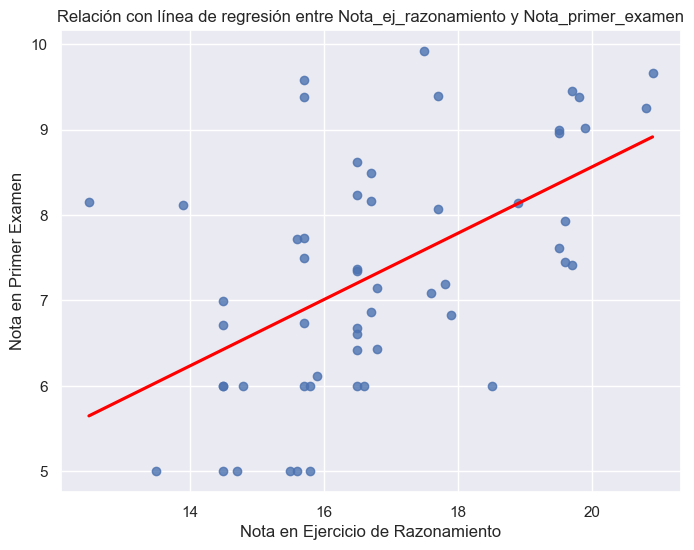

In [27]:
# Gráfico de dispersión entre Nota_ej_razonamiento y Nota_primer_examen
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='Nota_ej_razonamiento',
    y='Nota_primer_examen',
    hue='Genero',  # Por ejemplo, colorear los puntos por género si tiene sentido
    palette='Set1',
    alpha=0.8
)
plt.title("Relación entre Nota_ej_razonamiento y Nota_primer_examen")
plt.xlabel("Nota en Ejercicio de Razonamiento")
plt.ylabel("Nota en Primer Examen")
plt.grid(True)
plt.show()

# Agregamos una línea de regresión para observar la tendencia
plt.figure(figsize=(8, 6))
sns.regplot(
    data=df,
    x='Nota_ej_razonamiento',
    y='Nota_primer_examen',
    scatter_kws={'alpha': 0.8},  # Transparencia de los puntos
    line_kws={'color': 'red'},  # Color de la línea de regresión
    ci=None  # Sin intervalos de confianza para mayor claridad
)
plt.title("Relación con línea de regresión entre Nota_ej_razonamiento y Nota_primer_examen")
plt.xlabel("Nota en Ejercicio de Razonamiento")
plt.ylabel("Nota en Primer Examen")
plt.grid(True)
plt.show()

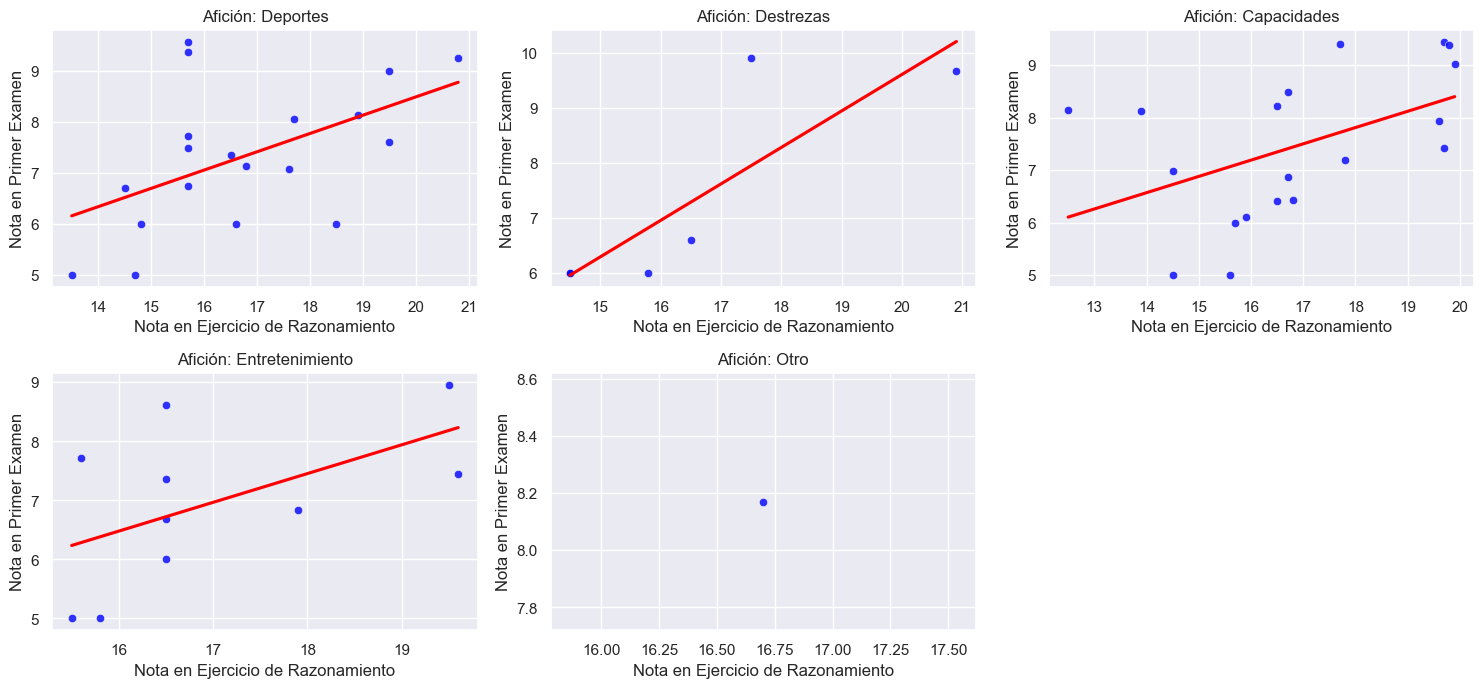

In [28]:
# Obtenemos las categorías únicas de la columna "Afición"
aficiones = df['Afición'].unique()

# Creamos un gráfico de dispersión con subgráficos para cada afición
plt.figure(figsize=(15, 10))

for i, aficion in enumerate(aficiones, 1):
    plt.subplot(3, 3, i)  # Ajustamos la cantidad de subplots según el número de aficiones
    subset = df[df['Afición'] == aficion]
    sns.scatterplot(
        data=subset,
        x='Nota_ej_razonamiento',
        y='Nota_primer_examen',
        alpha=0.8,
        color='blue'
    )
    sns.regplot(
        data=subset,
        x='Nota_ej_razonamiento',
        y='Nota_primer_examen',
        scatter=False,
        line_kws={'color': 'red'},
        ci=None
    )
    plt.title(f"Afición: {aficion}")
    plt.xlabel("Nota en Ejercicio de Razonamiento")
    plt.ylabel("Nota en Primer Examen")

plt.tight_layout()
plt.show()